In [76]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")


In [78]:
df = pd.read_csv("AIML Dataset.csv")

In [79]:
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [80]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [81]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [82]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [83]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [84]:
df.isnull().sum().sum()

np.int64(0)

In [85]:
df.shape[0]

6362620

In [86]:
round((df["isFraud"].value_counts()[1] / df.shape[0]) *100,2)

np.float64(0.13)

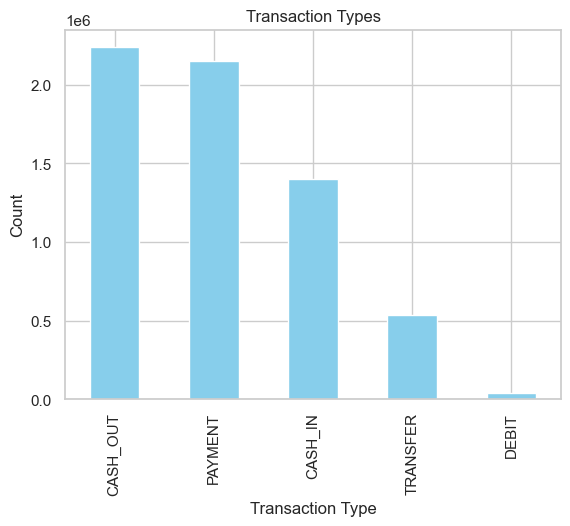

In [87]:
df["type"].value_counts().plot(kind="bar", title="Transaction Types", color="skyblue")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

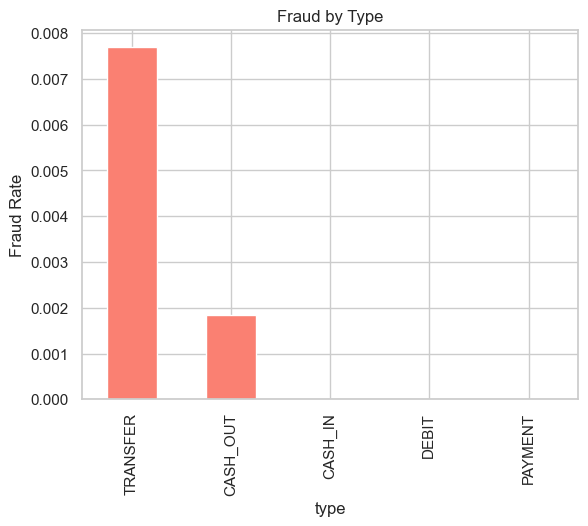

In [88]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar", title="Fraud by Type", color="salmon")
plt.ylabel("Fraud Rate")
plt.show()

In [89]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

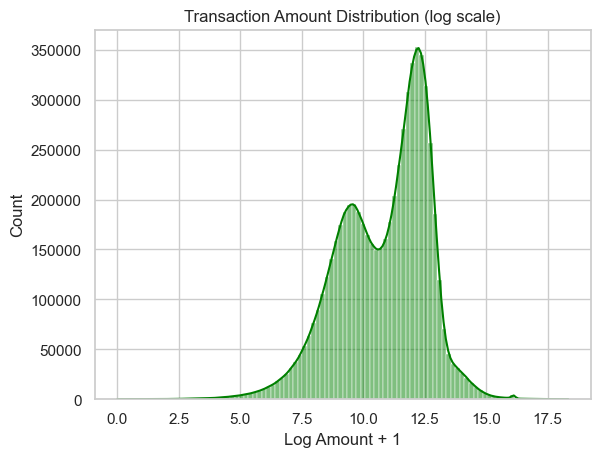

In [90]:
sns.histplot(np.log1p(df["amount"]), bins= 100, kde = True, color = "green" )
plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Log Amount + 1")
plt.show()

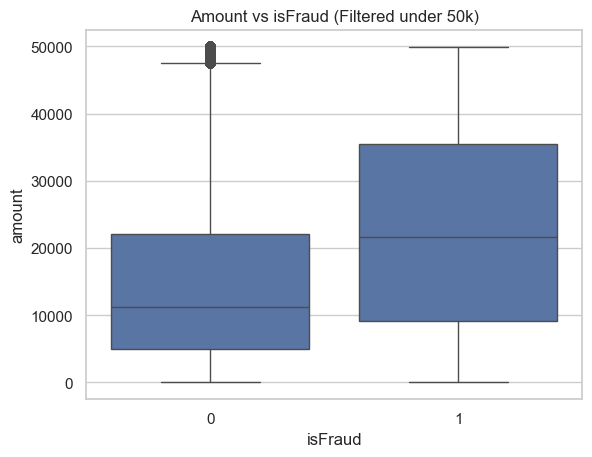

In [91]:
sns.boxplot(data=df[df["amount"] < 50000], x ="isFraud", y = "amount" )
plt.title("Amount vs isFraud (Filtered under 50k)")
plt.show()

In [92]:
df["balanceDiffOrig"] = df["oldbalanceOrg"] = df["newbalanceOrig"]
df["balanceDiffDest"] = df["oldbalanceDest"] = df["newbalanceDest"]

In [93]:
(df["balanceDiffOrig"] < 0).sum()

np.int64(0)

In [94]:
(df["balanceDiffDest"] < 0).sum()

np.int64(0)

In [95]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,160296.36,160296.36,M1979787155,0.0,0.0,0,0,160296.36,0.0
1,1,PAYMENT,1864.28,C1666544295,19384.72,19384.72,M2044282225,0.0,0.0,0,0,19384.72,0.0


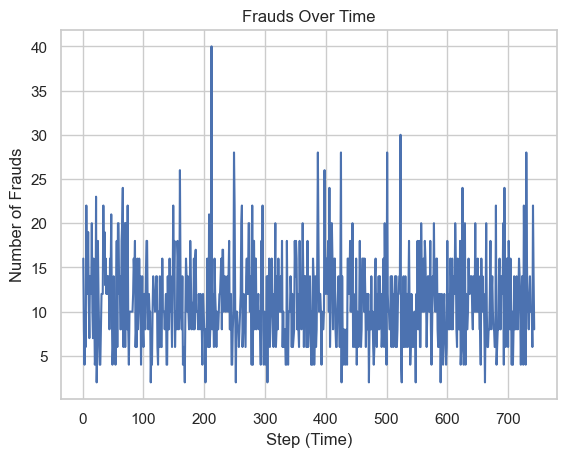

In [96]:
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label = "Frauds per Step")
plt.xlabel("Step (Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show()


In [97]:
df.drop(columns="step", inplace=True)

In [98]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,160296.36,160296.36,M1979787155,0.0,0.0,0,0,160296.36,0.0
1,PAYMENT,1864.28,C1666544295,19384.72,19384.72,M2044282225,0.0,0.0,0,0,19384.72,0.0
2,TRANSFER,181.00,C1305486145,0.00,0.00,C553264065,0.0,0.0,1,0,0.00,0.0
3,CASH_OUT,181.00,C840083671,0.00,0.00,C38997010,0.0,0.0,1,0,0.00,0.0
4,PAYMENT,11668.14,C2048537720,29885.86,29885.86,M1230701703,0.0,0.0,0,0,29885.86,0.0


In [99]:
top_senders = df["nameOrig"].value_counts().head()

In [100]:
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
Name: count, dtype: int64

In [101]:
top_recievers = df["nameDest"].value_counts().head(10)


In [102]:
top_recievers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [103]:
fraud_users = df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)

In [104]:
fraud_users

nameOrig
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C137533655     1
C1118430673    1
C749981943     1
C1334405552    1
C467632528     1
C1364127192    1
Name: count, dtype: int64

In [105]:
fraud_types = df[df["type"].isin(["TRANSFER", "CASH_OUT"])]

In [106]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

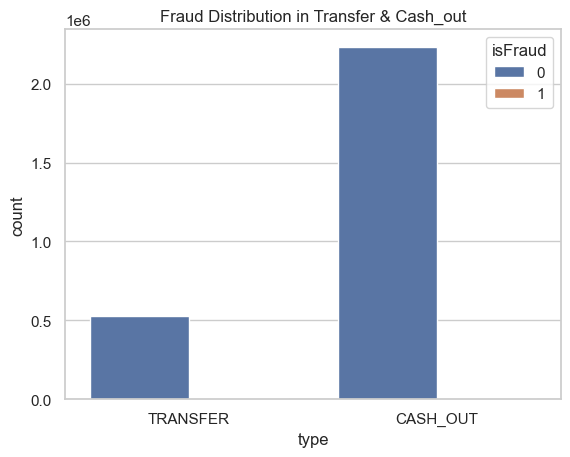

In [107]:
sns.countplot(data=fraud_types, x="type", hue="isFraud")
plt.title("Fraud Distribution in Transfer & Cash_out")
plt.show()

In [108]:
corr = df[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud"]].corr()

In [109]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.007861,-0.007861,0.459304,0.459304,0.076688
oldbalanceOrg,-0.007861,1.000000,1.000000,0.041837,0.041837,-0.008148
newbalanceOrig,-0.007861,1.000000,1.000000,0.041837,0.041837,-0.008148
oldbalanceDest,0.459304,0.041837,0.041837,1.000000,1.000000,0.000535
newbalanceDest,0.459304,0.041837,0.041837,1.000000,1.000000,0.000535
isFraud,0.076688,-0.008148,-0.008148,0.000535,0.000535,1.000000


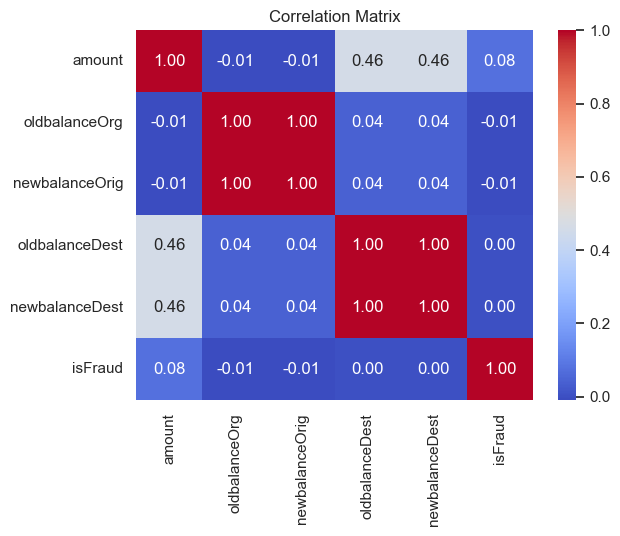

In [110]:
sns.heatmap(corr, annot=True, cmap = "coolwarm", fmt= ".2f")
plt.title("Correlation Matrix")
plt.show()

In [111]:
zero_after_transfer = df[
    (df["oldbalanceOrg"]> 0) &
    (df["newbalanceOrig"]==0) &
    (df["type"].isin(["TRANSFER", "CASH_OUT"]))
]

In [112]:
len(zero_after_transfer)

0

In [113]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest


In [114]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder

In [116]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,160296.36,160296.36,M1979787155,0.0,0.0,0,0,160296.36,0.0
1,PAYMENT,1864.28,C1666544295,19384.72,19384.72,M2044282225,0.0,0.0,0,0,19384.72,0.0
2,TRANSFER,181.00,C1305486145,0.00,0.00,C553264065,0.0,0.0,1,0,0.00,0.0
3,CASH_OUT,181.00,C840083671,0.00,0.00,C38997010,0.0,0.0,1,0,0.00,0.0
4,PAYMENT,11668.14,C2048537720,29885.86,29885.86,M1230701703,0.0,0.0,0,0,29885.86,0.0


In [117]:
df_model = df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis =1)

In [118]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,160296.36,160296.36,0.0,0.0,0,160296.36,0.0
1,PAYMENT,1864.28,19384.72,19384.72,0.0,0.0,0,19384.72,0.0
2,TRANSFER,181.00,0.00,0.00,0.0,0.0,1,0.00,0.0
3,CASH_OUT,181.00,0.00,0.00,0.0,0.0,1,0.00,0.0
4,PAYMENT,11668.14,29885.86,29885.86,0.0,0.0,0,29885.86,0.0


In [119]:
categorical = ["type"]
numeric = ["amount", "oldbalanceOrg","newbalanceOrig", "oldbalanceDest","newbalanceDest"]

In [120]:
y = df_model["isFraud"]
x = df_model.drop("isFraud", axis = 1)

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, stratify=y)

In [122]:
preprocessor = ColumnTransformer (
    transformers =[
       ("num", StandardScaler() , numeric),
       ("cat", OneHotEncoder(drop ="first"), categorical)
    ],
    remainder= "drop"
)

In [123]:
pipeline = Pipeline ([
    ("prep", preprocessor),
    ("clf", LogisticRegression(class_weight = "balanced", max_iter=1000))
])

In [124]:
pipeline.fit(x_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [125]:
y_pred =pipeline.predict(x_test)

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81   1906322
           1       0.00      0.94      0.01      2464

    accuracy                           0.68   1908786
   macro avg       0.50      0.81      0.41   1908786
weighted avg       1.00      0.68      0.81   1908786



In [127]:
confusion_matrix(y_test, y_pred)

array([[1296302,  610020],
       [    158,    2306]])

In [128]:
pipeline.score(x_test, y_test) *100

68.03318968181871

In [129]:
import joblib

joblib.dump(pipeline, "fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']